In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [26]:
m = pd.read_csv("data.csv")
m = m.drop(labels = [5, 6, 9, 12],axis = 0)
m["y"] = m["V"] / m["T"]
m

,V,T,P,y
0,1.5,37.52,28,0.039979
1,2.5,39.39,45,0.063468
2,1.5,18.42,57,0.081433
3,2.0,23.07,62,0.086693
4,2.0,20.66,73,0.096805
7,2.5,24.15,85,0.103520
8,5.0,45.86,105,0.109027
10,3.0,28.47,95,0.105374
11,2.0,40.22,34,0.049727
13,2.5,21.91,115,0.114103


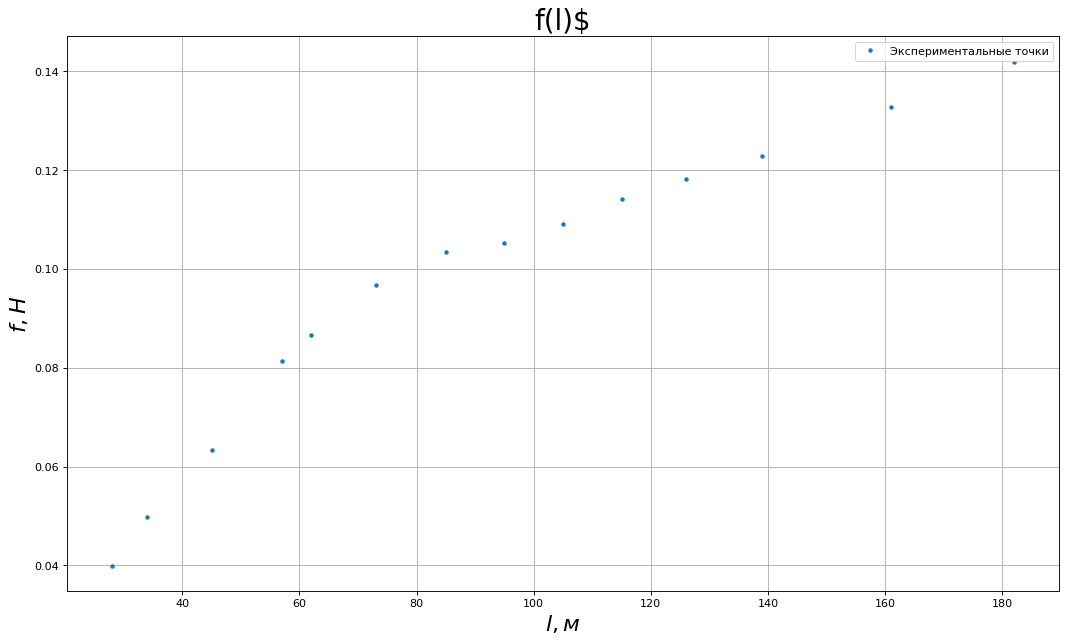

In [27]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=m["P"], y=m["y"], fmt='.', label='Экспериментальные точки')
plt.title(r"f(l)$", fontsize=25)
plt.xlabel(r"$l, м$", fontsize=20)
plt.ylabel(r"$f, H$", fontsize=20)
plt.grid(True)
plt.legend()
#plt.plot(m["l"], line(m["l"], params[0], params[1]), label="Истиная зависимость")

In [28]:
print(f"a = {params[0]:.3} \u00B1 {np.sqrt(cov[0][0]):.2}")
print(f"b = {params[1]:.3} \u00B1 {np.sqrt(cov[1][1]):.2}")

a = params[0]

NameError: name 'params' is not defined

In [ ]:
a * 0.11 / (0.00175 * 0.012)

52380.95238691226